In [169]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [86]:
print(os.listdir("../input"))

['train.csv', 'gender_submission.csv', 'test.csv']


In [87]:
pd.set_option('display.expand_frame_repr', False)

In [159]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

**Exploring the Data**

In [160]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [90]:
print(train.columns.values)
train.describe(include = 'all')

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sunderland, Mr. Victor Francis",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [91]:
print(train.dtypes)
print()
#Explore Nan values in each column
print(train.isna().sum())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [92]:
print(test.dtypes)
print()
print(test.isna().sum())

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


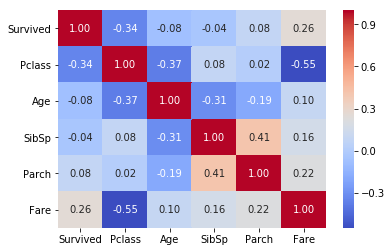

In [93]:
# Check the correlation for the current numeric feature set.
print(train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr())
sns.heatmap(train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(),\
            annot = True, fmt = ".2f", cmap = "coolwarm")

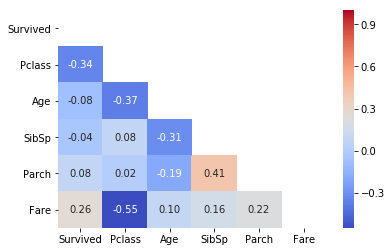

In [94]:
mask = np.zeros_like(train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), \
            annot = True, fmt = ".2f", cmap = "coolwarm", mask = mask)

**Exploring the data**

In [95]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Pclass:** -0.33 means the higher the less is the chance

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


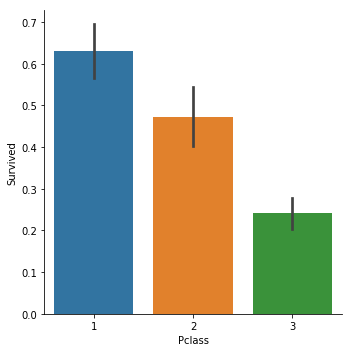

In [96]:
# the relation between Pclass and Survived and mouthache boxes
print(train[['Pclass', 'Survived']].groupby(['Pclass']).mean())
sns.catplot(x = 'Pclass', y = 'Survived',  kind = 'bar', data = train)

**Sex:**

        Survived
Sex             
female  0.742038
male    0.188908


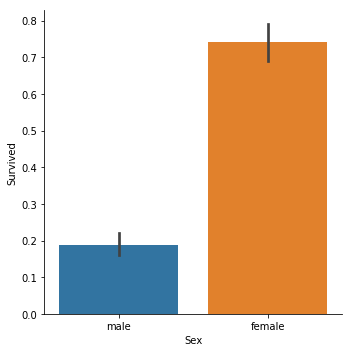

In [161]:
print(train[['Sex', 'Survived']].groupby(['Sex']).mean())
sns.catplot(x = 'Sex', y = 'Survived',  kind = 'bar', data = train)

**Sex AND Age**

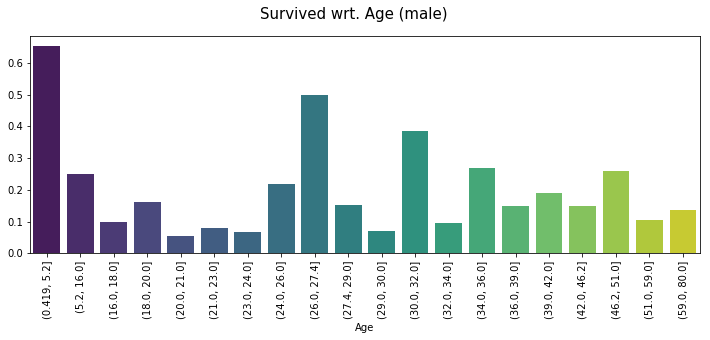

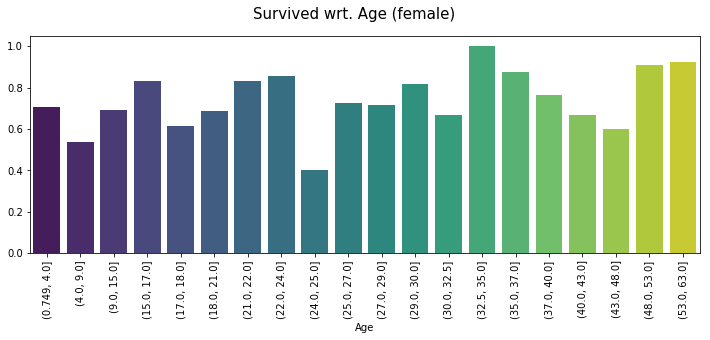

In [168]:
palette = 'viridis'
for sex in ('male', 'female'):
    tr = train[train['Sex'] == sex]
    age_bins = pd.qcut(tr['Age'], 20)
    df = tr.groupby(age_bins)['Survived'].mean()
    
    plt.figure(figsize=(12,4)).suptitle(f'Survived wrt. Age ({sex})', fontsize=15);
    sns.barplot(df.index, df.values, palette = palette).set_xticklabels(df.index, rotation=90);

> ***PClass AND Gender*** 

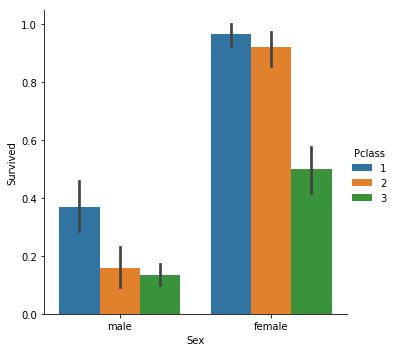

In [98]:
sns.catplot(x = 'Sex', y = 'Survived',  kind = 'bar', data = train, hue = 'Pclass')

**Fare:**

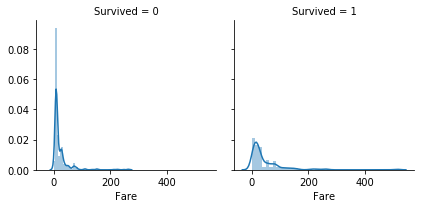

In [99]:
f = sns.FacetGrid(train, col = 'Survived')
f = f.map(sns.distplot, "Fare")

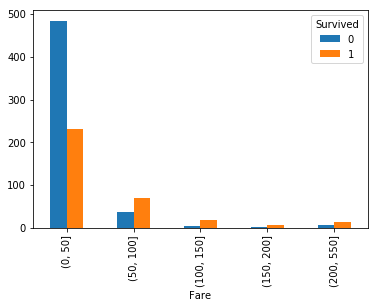

In [100]:
group = pd.cut(train.Fare, [0, 50, 100, 150, 200, 550])
piv_fare = train.pivot_table(index = group, columns = 'Survived', values = 'Fare', aggfunc = 'count')
piv_fare.plot(kind = 'bar')

**Age:**

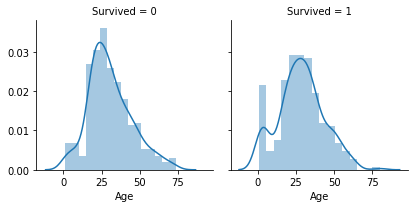

In [101]:
ag = sns.FacetGrid(train, col = 'Survived')
ag = ag.map(sns.distplot, "Age")

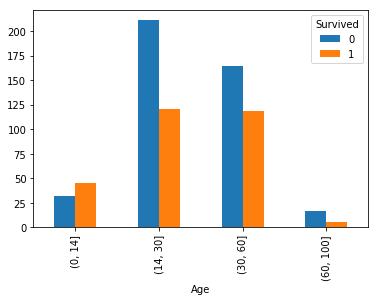

In [102]:
group = pd.cut(train.Age, [0, 14, 30, 60, 100])
piv_fare = train.pivot_table(index = group, columns = 'Survived', values = 'Age', aggfunc = 'count')
piv_fare.plot(kind = 'bar')

Through this bar plot we can confirm that children did have a higher chance of survival

**Embarked:**

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


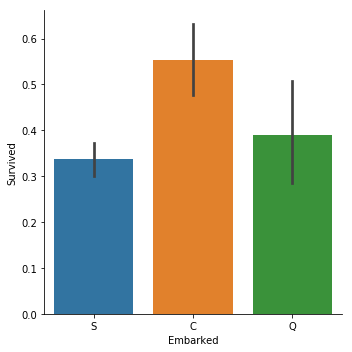

In [103]:
print(train[['Embarked', 'Survived']].groupby(['Embarked']).mean())
sns.catplot(x = 'Embarked', y = 'Survived',  kind = 'bar', data = train)

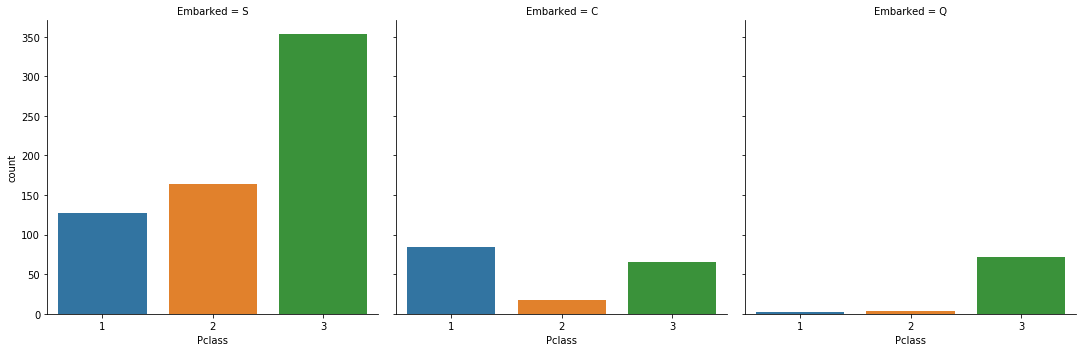

In [104]:
sns.catplot('Pclass', kind = 'count', col = 'Embarked', data = train)

**SibSp and Parch**

       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000


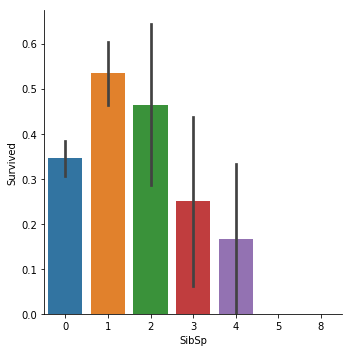

In [105]:
print(train[['SibSp', 'Survived']].groupby(['SibSp']).mean())
sns.catplot(x = 'SibSp', y = 'Survived', data = train, kind = 'bar')

       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000


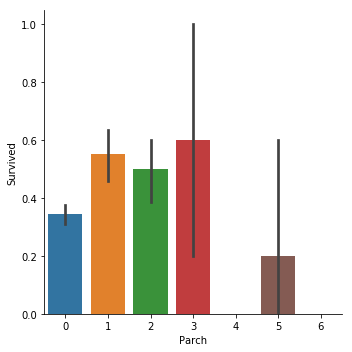

In [106]:
print(train[['Parch', 'Survived']].groupby(['Parch']).mean())
sns.catplot(x = 'Parch', y = 'Survived', data = train, kind = 'bar')

**Name**

In [107]:
print(train.Name.head(1))

0    Braund, Mr. Owen Harris
Name: Name, dtype: object


In [108]:
print(train.Name.head(1).str.split(','))

0    [Braund,  Mr. Owen Harris]
Name: Name, dtype: object


In [110]:
for dataset in [train, test]:
    dataset['Title'] = dataset['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
    print(dataset['Title'].value_counts())
    print()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Don               1
Mme               1
Jonkheer          1
Capt              1
Ms                1
Lady              1
Sir               1
the Countess      1
Name: Title, dtype: int64

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64



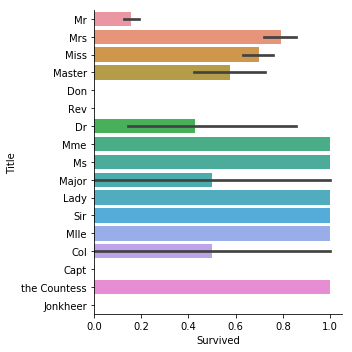

In [111]:
sns.catplot(x = 'Survived', y = 'Title', data = train, kind = 'bar')

**Ticket**

                   Survived
Ticket                     
110152             1.000000
110413             0.666667
110465             0.000000
110564             1.000000
110813             1.000000
111240             0.000000
111320             0.000000
111361             1.000000
111369             1.000000
111426             1.000000
111427             1.000000
111428             1.000000
112050             0.000000
112052             0.000000
112053             1.000000
112058             0.000000
112059             0.000000
112277             1.000000
112379             0.000000
113028             0.000000
113043             0.000000
113050             0.000000
113051             0.000000
113055             1.000000
113056             0.000000
113059             0.000000
113501             0.000000
113503             0.000000
113505             1.000000
113509             0.000000
...                     ...
SOTON/OQ 392082    0.000000
SOTON/OQ 392086    0.000000
SOTON/OQ 392089    1

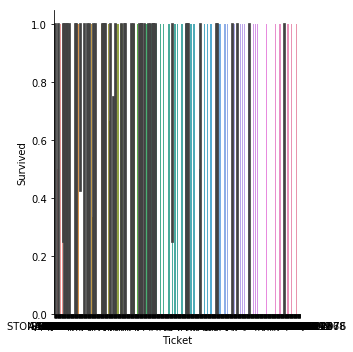

In [112]:
print(train[['Ticket', 'Survived']].groupby(['Ticket']).mean())
sns.catplot(x = 'Ticket', y = 'Survived',  kind = 'bar', data = train)

### ***About null***

In [113]:
for df in [train, test]:
    print(df.shape)
    print()
    print(df.isna().sum())

(891, 13)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64
(418, 12)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [114]:
# Drop rows with nulls for Embarked
for df in [train, test]:
    df.dropna(subset = ['Embarked'], inplace = True)

**Fare**

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title]
Index: []
     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  Fare Cabin Embarked Title
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   NaN   NaN        S    Mr


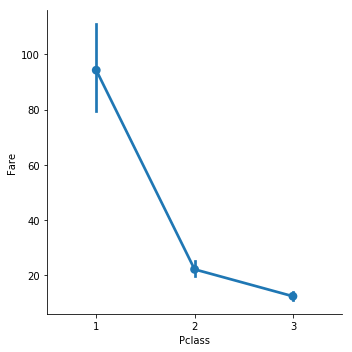

In [116]:
print(train[train['Fare'].isnull()])

print(test[test['Fare'].isnull()])
# We can deduce that Pclass should be related to Fares.
sns.catplot(x = 'Pclass', y = 'Fare', data = test, kind = 'point')

In [117]:
# There is a clear relation between Pclass and Fare. We can use this information to impute the missing fare value.
# We see that the passenger is from Pclass 3. So we take a median value for all the Pclass 3 fares.
test['Fare'].fillna(test[test['Pclass'] == 3].Fare.median(), inplace = True)

**Age**

Approaching missing ages by using titles (Ms, Mrs and so on)

                    Age
Title                  
Capt          70.000000
Col           58.000000
Don           40.000000
Dr            42.000000
Jonkheer      38.000000
Lady          48.000000
Major         48.500000
Master         4.574167
Miss          21.662069
Mlle          24.000000
Mme           24.000000
Mr            32.368090
Mrs           35.654206
Ms            28.000000
Rev           43.166667
Sir           49.000000
the Countess  33.000000


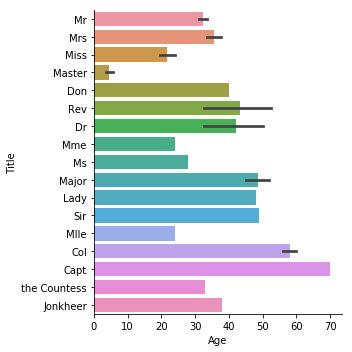

In [118]:
print(train[['Age','Title']].groupby('Title').mean())
sns.catplot(x = 'Age', y = 'Title', data = train, kind = 'bar')

In [119]:
def getTitle(series):
    return series.str.split(',').str[1].str.split('.').str[0].str.strip()
print(getTitle(train[train.Age.isnull()].Name).value_counts())

mr_mask = train['Title'] == 'Mr'
miss_mask = train['Title'] == 'Miss'
mrs_mask = train['Title'] == 'Mrs'
master_mask = train['Title'] == 'Master'
dr_mask = train['Title'] == 'Dr'
train.loc[mr_mask, 'Age'] = train.loc[mr_mask, 'Age'].fillna(train[train.Title == 'Mr'].Age.mean())
train.loc[miss_mask, 'Age'] = train.loc[miss_mask, 'Age'].fillna(train[train.Title == 'Miss'].Age.mean())
train.loc[mrs_mask, 'Age'] = train.loc[mrs_mask, 'Age'].fillna(train[train.Title == 'Mrs'].Age.mean())
train.loc[master_mask, 'Age'] = train.loc[master_mask, 'Age'].fillna(train[train.Title == 'Master'].Age.mean())
train.loc[dr_mask, 'Age'] = train.loc[dr_mask, 'Age'].fillna(train[train.Title == 'Dr'].Age.mean())
print()

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: Name, dtype: int64



In [120]:
print(getTitle(train[train.Age.isnull()].Name).value_counts())

Series([], Name: Name, dtype: int64)


In [125]:
print(getTitle(test[test.Age.isnull()].Name).value_counts())

mr_mask = test['Title'] == 'Mr'
miss_mask = test['Title'] == 'Miss'
mrs_mask = test['Title'] == 'Mrs'
master_mask = test['Title'] == 'Master'
ms_mask = test['Title'] == 'Ms'
test.loc[mr_mask, 'Age'] = test.loc[mr_mask, 'Age'].fillna(test[test.Title == 'Mr'].Age.mean())
test.loc[miss_mask, 'Age'] = test.loc[miss_mask, 'Age'].fillna(test[test.Title == 'Miss'].Age.mean())
test.loc[mrs_mask, 'Age'] = test.loc[mrs_mask, 'Age'].fillna(test[test.Title == 'Mrs'].Age.mean())
test.loc[master_mask, 'Age'] = test.loc[master_mask, 'Age'].fillna(test[test.Title == 'Master'].Age.mean())
test.loc[ms_mask, 'Age'] = test.loc[ms_mask, 'Age'].fillna(test[test.Title == 'Ms'].Age.mean())

Ms    1
Name: Name, dtype: int64


In [128]:
print(getTitle(test[test.Age.isnull()].Name).value_counts())

Ms    1
Name: Name, dtype: int64


In [127]:
print(train.isna().sum())
print(test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64


In [129]:
train.drop(columns=['PassengerId'], inplace = True)
[df.drop(columns=['Ticket'], inplace = True) for df in [train, test]]

[None, None]

Encode all the categorical features. One of things to lookout for is the Dummy Trap

In [130]:
[train, test] = [pd.get_dummies(data = df, columns = ['Pclass', 'Sex', 'Embarked']) for df in [train, test]]

In [131]:
for df in [train, test]:
    df['HasCabin'] = df['Cabin'].notna().astype(int)
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] > 1).astype(int)

In [132]:
[df.drop(columns=['Cabin', 'SibSp', 'Parch'], inplace = True) for df in [train, test]]

[None, None]

In [133]:
print(test)

     PassengerId                                               Name        Age      Fare   Title  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  HasCabin  FamilySize  IsAlone
0            892                                   Kelly, Mr. James  34.500000    7.8292      Mr         0         0         1           0         1           0           1           0         0           1        0
1            893                   Wilkes, Mrs. James (Ellen Needs)  47.000000    7.0000     Mrs         0         0         1           1         0           0           0           1         0           2        1
2            894                          Myles, Mr. Thomas Francis  62.000000    9.6875      Mr         0         1         0           0         1           0           1           0         0           1        0
3            895                                   Wirz, Mr. Albert  27.000000    8.6625      Mr         0         0         1          

In [134]:
[df.drop(columns=['Name'], inplace = True) for df in [train, test]]
[train, test] = [pd.get_dummies(data = df, columns = ['Title']) for df in [train, test]]

In [135]:
print(train.columns.values)
print(test.columns.values)

['Survived' 'Age' 'Fare' 'Pclass_1' 'Pclass_2' 'Pclass_3' 'Sex_female'
 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'HasCabin' 'FamilySize'
 'IsAlone' 'Title_Capt' 'Title_Col' 'Title_Don' 'Title_Dr'
 'Title_Jonkheer' 'Title_Lady' 'Title_Major' 'Title_Master' 'Title_Miss'
 'Title_Mlle' 'Title_Mme' 'Title_Mr' 'Title_Mrs' 'Title_Ms' 'Title_Rev'
 'Title_Sir' 'Title_the Countess']
['PassengerId' 'Age' 'Fare' 'Pclass_1' 'Pclass_2' 'Pclass_3' 'Sex_female'
 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'HasCabin' 'FamilySize'
 'IsAlone' 'Title_Col' 'Title_Dona' 'Title_Dr' 'Title_Master' 'Title_Miss'
 'Title_Mr' 'Title_Mrs' 'Title_Ms' 'Title_Rev']


In [136]:
train.corr()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,HasCabin,FamilySize,IsAlone,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
Survived,1.000000,-0.094463,0.255290,0.282368,0.095002,-0.320171,0.541585,-0.541585,0.169966,0.004536,-0.151777,0.313435,0.018277,0.206207,-0.026409,0.011485,-0.026409,0.008454,-0.026409,0.042642,0.011485,0.085998,0.326352,0.060339,0.042642,-0.547689,0.337892,0.042642,-0.064871,0.042642,0.042642
Age,-0.094463,1.000000,0.088161,0.328319,0.008113,-0.288885,-0.123631,0.123631,0.042936,-0.047523,-0.007704,0.230972,-0.280536,-0.194362,0.102158,0.101511,0.026110,0.082774,0.021040,0.046389,0.067435,-0.411971,-0.306997,-0.020445,-0.014449,0.237607,0.181085,-0.004309,0.083855,0.048924,0.008365
Fare,0.255290,0.088161,1.000000,0.590576,-0.117609,-0.411932,0.179958,-0.179958,0.270731,-0.116684,-0.163758,0.480425,0.218658,0.274079,0.026284,-0.001025,-0.002956,0.030620,-0.021685,0.005069,-0.003415,0.011390,0.117078,0.026104,0.025135,-0.181692,0.103434,-0.012902,-0.022876,0.016777,0.036756
Pclass_1,0.282368,0.328319,0.590576,1.000000,-0.287653,-0.625395,0.093142,-0.093142,0.299472,-0.154680,-0.165022,0.787224,-0.044054,0.117091,0.059599,0.084333,0.059599,0.098682,0.059599,0.059599,0.084333,-0.084138,0.009342,0.084333,0.059599,-0.093084,0.084685,-0.018895,-0.046414,0.059599,0.059599
Pclass_2,0.095002,0.008113,-0.117609,-0.287653,1.000000,-0.567432,0.066459,-0.066459,-0.126039,-0.127705,0.190824,-0.171006,-0.039263,0.038178,-0.017144,-0.024259,-0.017144,0.017314,-0.017144,-0.017144,-0.024259,0.009658,-0.023873,-0.024259,-0.017144,-0.090085,0.122898,0.065687,0.161354,-0.017144,-0.017144
Pclass_3,-0.320171,-0.288885,-0.411932,-0.625395,-0.567432,1.000000,-0.134227,0.134227,-0.154785,0.237035,-0.013594,-0.537496,0.069865,-0.131775,-0.037273,-0.052741,-0.037273,-0.098950,-0.037273,-0.037273,-0.052741,0.064470,0.011419,-0.052741,-0.037273,0.153426,-0.172939,-0.037273,-0.091558,-0.037273,-0.037273
Sex_female,0.541585,-0.123631,0.179958,0.093142,0.066459,-0.134227,1.000000,-1.000000,0.084520,0.075217,-0.121405,0.135589,0.203191,0.306985,-0.024676,-0.034917,-0.024676,-0.038844,-0.024676,0.045636,-0.034917,-0.159612,0.687596,0.064575,0.045636,-0.866888,0.547508,0.045636,-0.060616,-0.024676,0.045636
Sex_male,-0.541585,0.123631,-0.179958,-0.093142,-0.066459,0.134227,-1.000000,1.000000,-0.084520,-0.075217,0.121405,-0.135589,-0.203191,-0.306985,0.024676,0.034917,0.024676,0.038844,0.024676,-0.045636,0.034917,0.159612,-0.687596,-0.064575,-0.045636,0.866888,-0.547508,-0.045636,0.060616,0.024676,-0.045636
Embarked_C,0.169966,0.042936,0.270731,0.299472,-0.126039,-0.154785,0.084520,-0.084520,1.000000,-0.148646,-0.782613,0.211375,-0.046852,0.094513,-0.016199,0.037725,0.069519,0.022014,-0.016199,0.069519,-0.022921,-0.035471,0.027081,0.098371,0.069519,-0.073976,0.062756,-0.016199,-0.039791,0.069519,-0.016199
Embarked_Q,0.004536,-0.047523,-0.116684,-0.154680,-0.127705,0.237035,0.075217,-0.075217,-0.148646,1.000000,-0.499261,-0.128805,-0.059007,-0.087099,-0.010334,-0.014622,-0.010334,0.017814,-0.010334,-0.010334,-0.014622,0.010330,0.172045,-0.014622,-0.010334,-0.079283,-0.089348,-0.010334,0.023461,-0.010334,-0.010334


In [137]:
X = train[['Fare', 'Pclass_1', 'Pclass_3', 'Sex_female', 'Embarked_C', 'Embarked_S', 'HasCabin', 'IsAlone', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs']]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
print(X_train.shape, X_test.shape)

(800, 12) (89, 12)


In [138]:
print(y.value_counts())

0    549
1    340
Name: Survived, dtype: int64


In [139]:
y_default = pd.Series([0] * train['Survived'].shape[0], name = 'Survived')
print(y_default.value_counts())

0    889
Name: Survived, dtype: int64


In [140]:
print(confusion_matrix(y, y_default))
print()
print(accuracy_score(y, y_default))
#Initial accuracy

[[549   0]
 [340   0]]

0.6175478065241845


**3.1 Choosing an extimator**

In [141]:
print("LinearSVC")
classifier = LinearSVC(dual = False)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[44 14]
 [ 6 25]]
0.7752808988764045


In [155]:
print("KNeighborsClassifier")
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[53  5]
 [15 16]]
0.7752808988764045


In [145]:
print("AdaBoostClassifier")
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("BaggingClassifier")
classifier = BaggingClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

AdaBoostClassifier
[[53  5]
 [ 6 25]]
0.8764044943820225
BaggingClassifier
[[55  3]
 [ 6 25]]
0.898876404494382


In [171]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[54  4]
 [10 21]]


In [172]:
print(accuracy_score(y_test, y_pred))

0.8426966292134831


In [173]:
X_validation = test[['Fare', 'Pclass_1', 'Pclass_3', 'Sex_female', 'Embarked_C', 'Embarked_S', 'HasCabin', 'IsAlone', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs']]

KeyError: "['Pclass_1' 'Pclass_3' 'Sex_female' 'Embarked_C' 'Embarked_S' 'HasCabin'\n 'IsAlone' 'Title_Master' 'Title_Miss' 'Title_Mr' 'Title_Mrs'] not in index"

In [174]:
y_valid = classifier.predict(X_validation)

**Submission**

In [152]:
# Creating final output file
validation_pId = test.loc[:, 'PassengerId']
my_submission = pd.DataFrame(data={'PassengerId':validation_pId, 'Survived':y_valid})
print(my_submission['Survived'].value_counts())

0    266
1    152
Name: Survived, dtype: int64


In [154]:
my_submission.to_csv('submission.csv', index = False)